### Mini Project 3

# **Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [104]:
df = pd.read_csv('marketing_campaign_data.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

---

## **Conversion Rate Analysis Based On Income, Spending And Age**

### Feature Engineering
---

In [106]:
df1 = df.copy()

In [107]:
# Membuat kolom baru untuk umur
df1['age'] = 2024 - df1['Year_Birth']

# Membuat tabel kelompok umur
df1['age_group'] = np.where(df1['age'] <= 40, '<40',
                   np.where(df1['age'] <= 60, '41-60',
                  '>60'))

# Membuat kolom untuk jumlah anak
df1['total_children'] = df1['Kidhome'] + df1['Teenhome']

# Membuat tabel total pengeluaran
df1['total_spending'] = df1['MntCoke'] + df1['MntFruits'] + df1['MntMeatProducts'] + df1['MntFishProducts'] + df1['MntSweetProducts'] + df1['MntGoldProds']

# Membuat tabel total transaksi
df1['total_transaction'] = df1['NumDealsPurchases'] + df1['NumWebPurchases'] + df1['NumCatalogPurchases'] + df1['NumStorePurchases']

# Membuat tabel conversion rate
df1['cvr'] = df1['Response'] / df1['NumWebVisitsMonth']

# Menampilkan tabel
df1.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Complain,Z_CostContact,Z_Revenue,Response,age,age_group,total_children,total_spending,total_transaction,cvr
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,3,11,1,67,>60,0,1617000,25,0.142857
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,3,11,0,70,>60,2,27000,6,0.000000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,3,11,0,59,41-60,0,776000,21,0.000000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,3,11,0,40,<40,1,53000,8,0.000000
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,3,11,0,43,41-60,1,422000,19,0.000000


### Plot
---

In [8]:
# Menghitung rata-rata conversion rate per kelompok umur
age_group_mean = df1.groupby('age_group')['cvr'].mean().reset_index()
age_group_mean

,age_group,cvr
0,41-60,0.037010
1,<40,0.070370
2,>60,0.045453


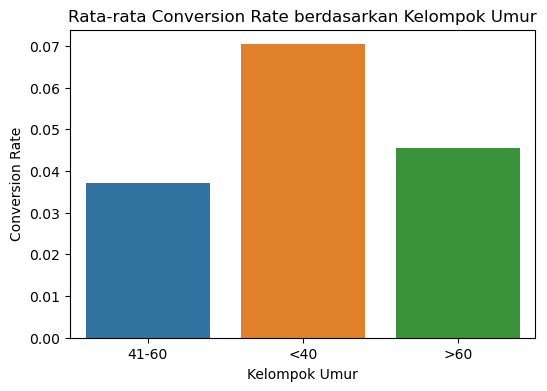

In [9]:
# Membuat plot
plt.figure(figsize=(6, 4))
sns.barplot(x='age_group', y='cvr', data=age_group_mean)
plt.title('Rata-rata Conversion Rate berdasarkan Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Conversion Rate')
plt.show()

**Kesimpulan:**
- Kelompok umur <40 tahun memiliki rata-rata tingkat conversion rate yang tinggi, yang menunjukkan kemungkinan ketertarikan terhadap marketing campaign yang ditawarkan dan juga adanya familiaritas terhadap teknologi dan platform online.
- Kelompok umur 40-60 tahun memiliki rata-rata tingkat conversion rate yang paling rendah, yang menunjukkan kemungkinan kurangnya ketertarikan terhadap marketing campaign yang ditawarkan.

---

## **Data Cleaning & Preprocessing**

In [108]:
df2 = df1.copy()

### Handle Missing Values
---

In [109]:
df2.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
age                     0
age_group               0
total_children          0
total_spending          0
total_transaction       0
cvr                    11
dtype: int64

In [110]:
df2.fillna(df2['Income'].median(), inplace=True)
df2.fillna(df2['cvr'].median(), inplace=True)

In [111]:
df2.isna().sum()

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
age                    0
age_group              0
total_children         0
total_spending         0
total_transaction      0
cvr                    0
dtype: int64

### Handle Duplicated Data
---

In [112]:
df2.duplicated().sum()

0

### Handle Outlier
---

In [113]:
#change Dt_Customer dtype from object to datetime 64[ns]
df2['Dt_Customer'] = pd.to_datetime(df2['Dt_Customer'], format='%d-%m-%Y')

In [114]:
#looping to categorize cat include categorical columns and num include numeric columns
cats = []
nums = []
date = []
for col in df2.columns: 
    if df2[col].dtype == 'O':
        cats.append(col)
    elif df2[col].dtype == 'int64' or df2[col].dtype == 'float64':
        nums.append(col)
    else:
        date.append(col)

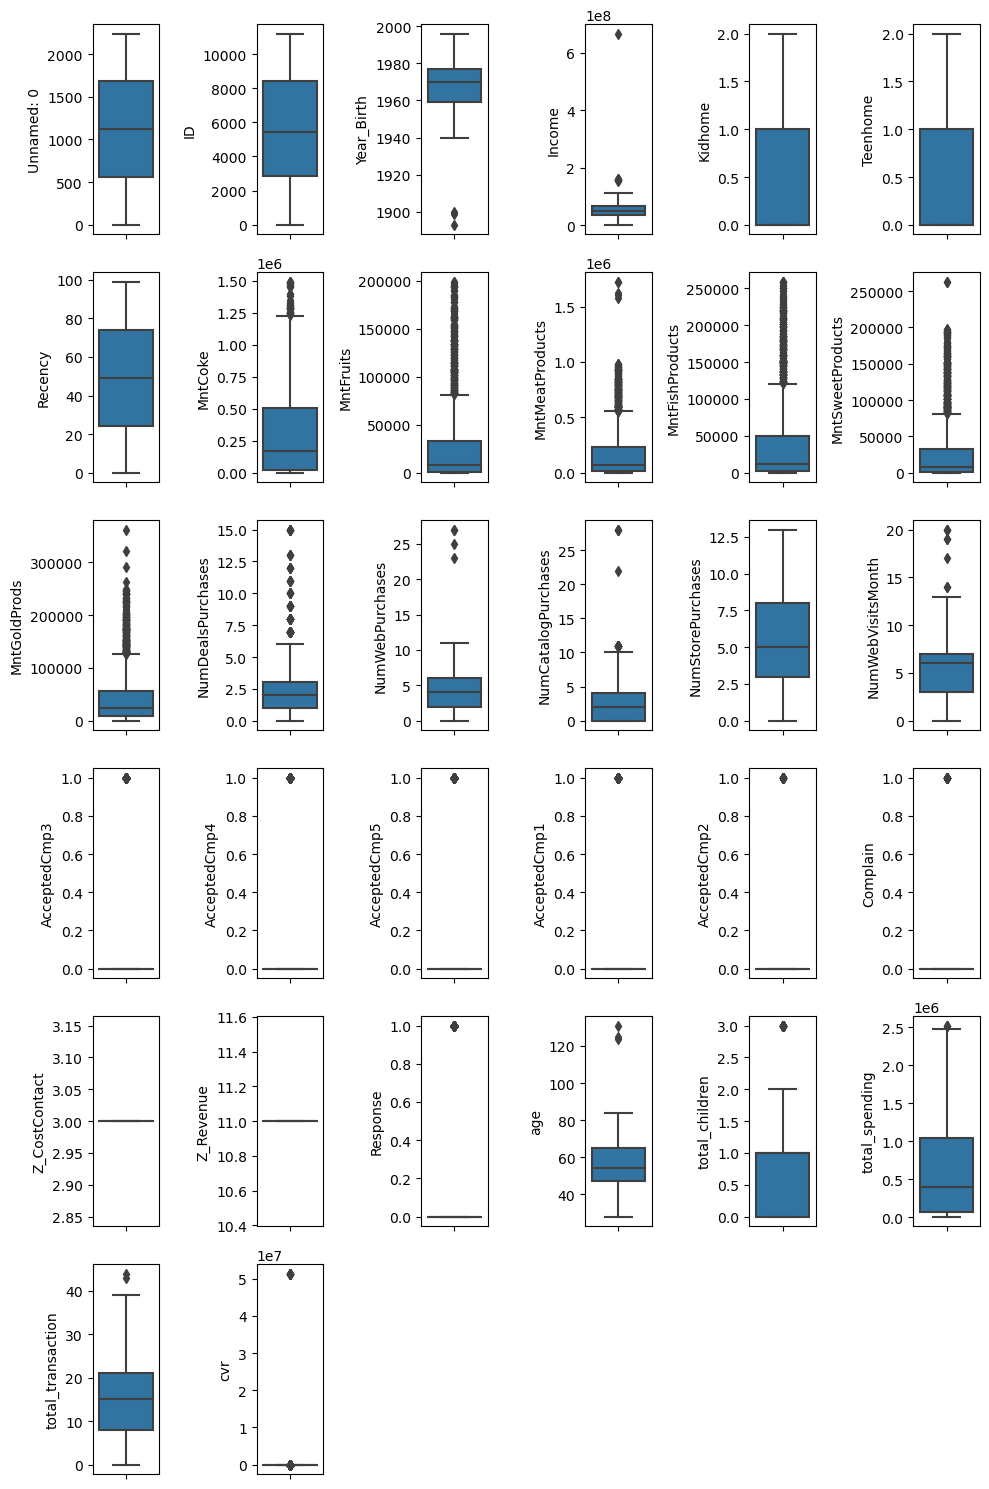

In [115]:
plt.figure(figsize= (10,15))
for i in range(len(nums)):
    plt.subplot(6, 6, i+1)
    sns.boxplot(y = df2[nums[i]], orient='v')
    plt.tight_layout()

In [116]:
from scipy import stats

In [117]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df2)}')

df_out = ['Income','Year_Birth','age','cvr']

filtered_entries = np.array([True] * len(df2))

for col in df_out:
    zscore = abs(stats.zscore(df2[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df2 = df2[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df2)}')

Jumlah baris sebelum memfilter outlier: 2240
Jumlah baris setelah memfilter outlier: 2222


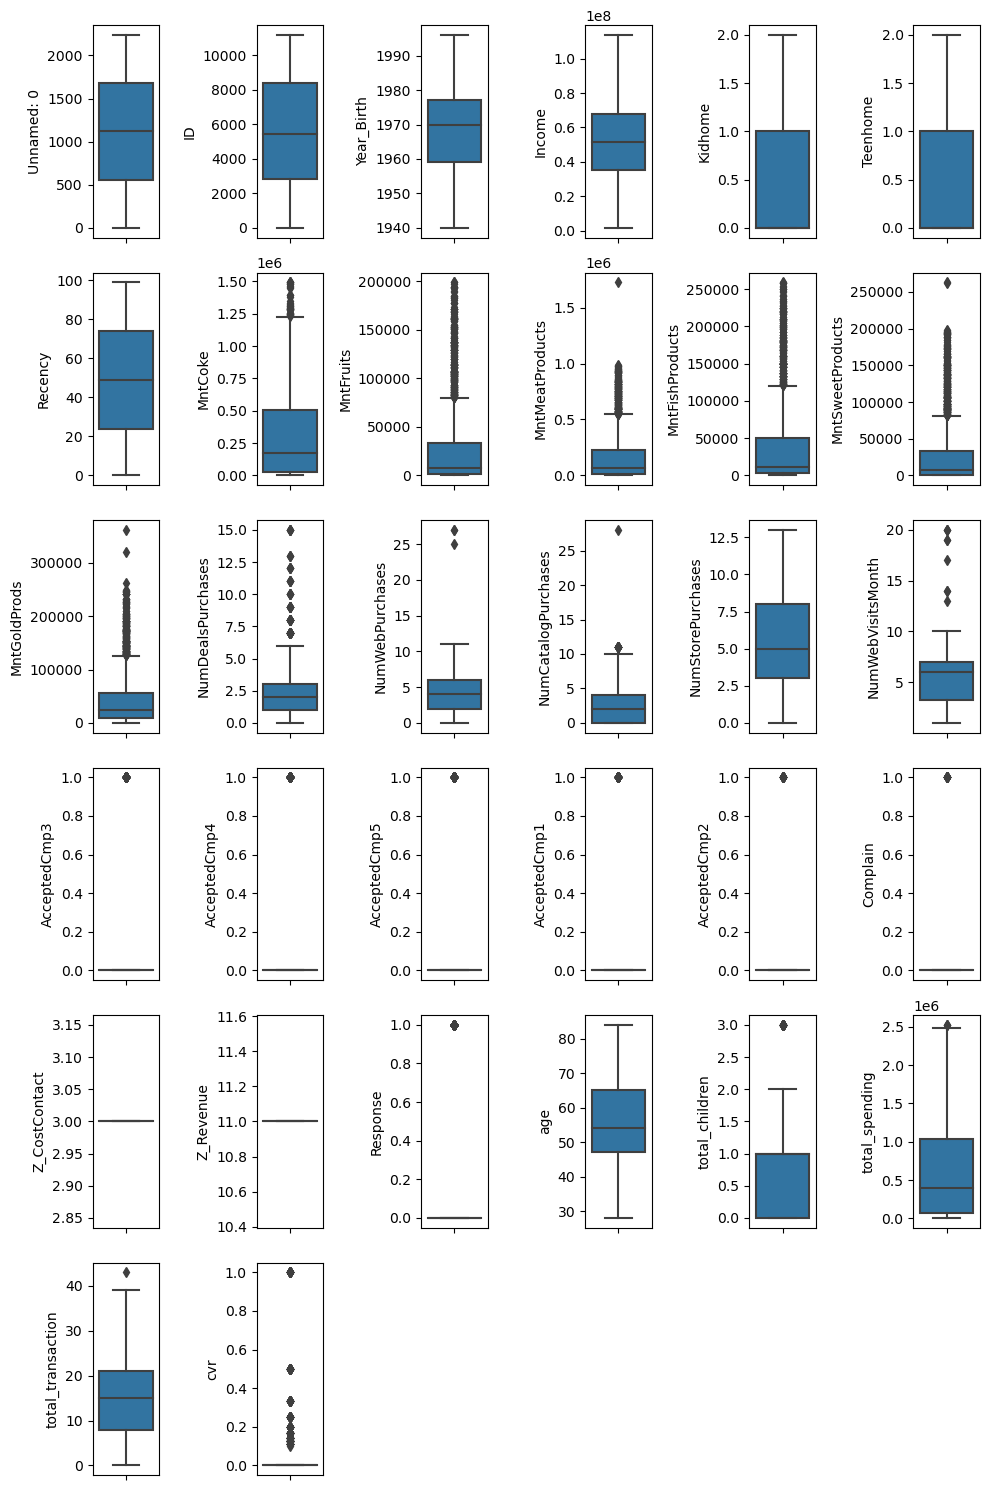

In [118]:
plt.figure(figsize= (10,15))
for i in range(len(nums)):
    plt.subplot(6, 6, i+1)
    sns.boxplot(y = df2[nums[i]], orient='v')
    plt.tight_layout()

### Feature Selection
---

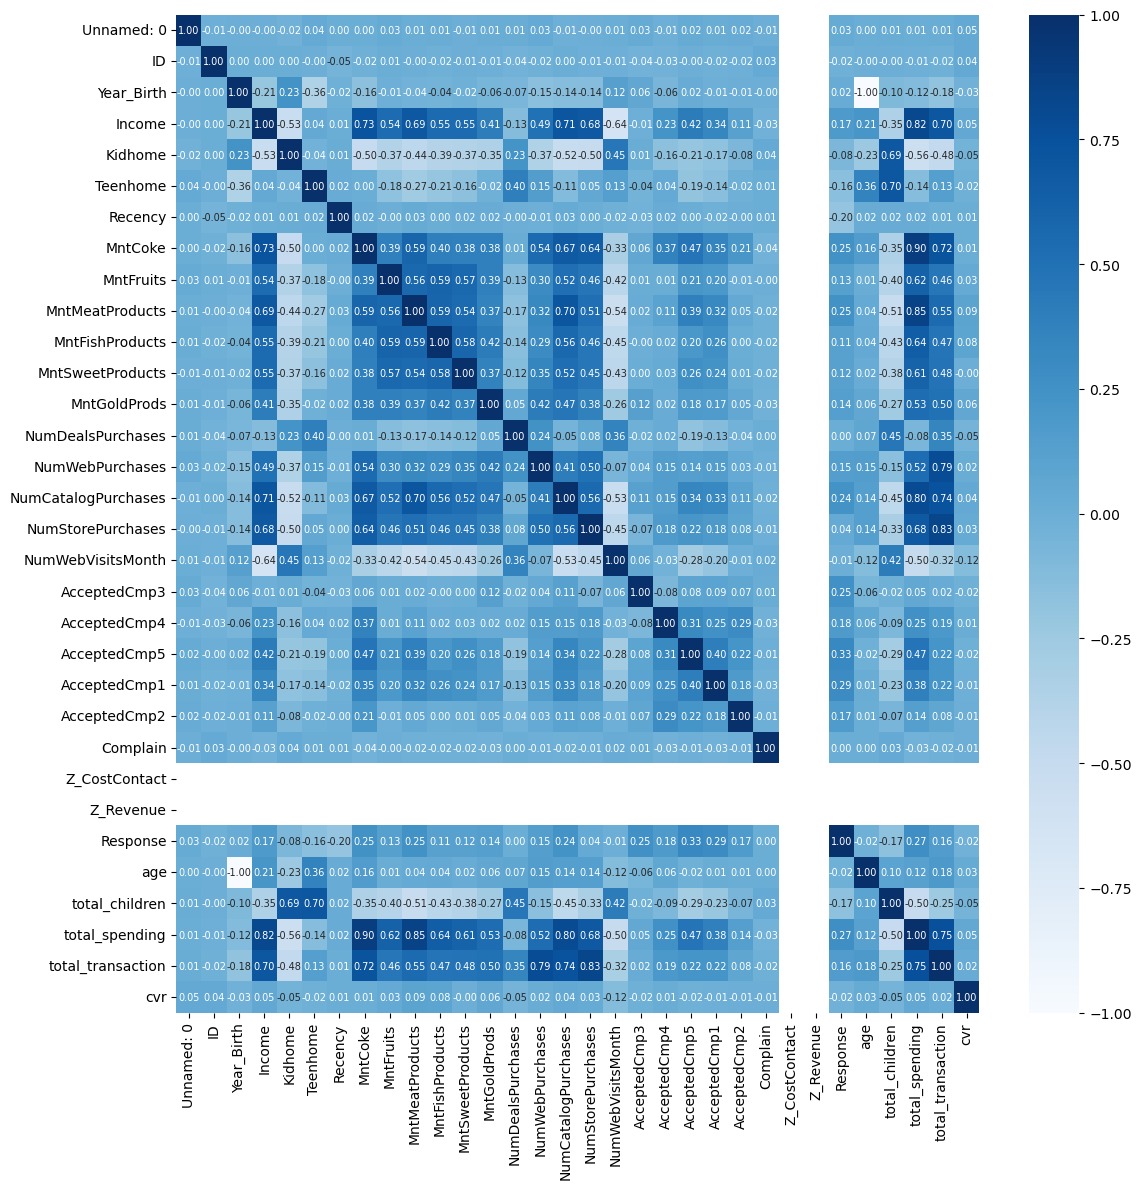

In [29]:
plt.figure(figsize=(12, 12))  # Increase the figure size further
heatmap = sns.heatmap(df2[nums].corr(), cmap='Blues', annot=True, fmt='.2f', annot_kws={"size": 7})
plt.tight_layout()
plt.show()

In [119]:
df2.drop(columns=['Unnamed: 0', 'ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)

### Feature Encoding
---

In [120]:
df2['Education'].value_counts()

Education
S1     1122
S3      478
S2      369
D3      199
SMA      54
Name: count, dtype: int64

In [121]:
df3 = df2.copy()

In [122]:
# Feature encoding untuk kolom education
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

df3['Education'] = df3['Education'].map(mapping_education)

In [123]:
df3.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,age_group,total_children,total_spending,total_transaction,cvr
0,1957,2,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,...,0,0,0,1,67,>60,0,1617000,25,0.142857
1,1954,2,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,...,0,0,0,0,70,>60,2,27000,6,0.000000
2,1965,2,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,...,0,0,0,0,59,41-60,0,776000,21,0.000000
3,1984,2,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,...,0,0,0,0,40,<40,1,53000,8,0.000000
4,1981,4,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,...,0,0,0,0,43,41-60,1,422000,19,0.000000


### Standardization
---

In [126]:
dfs = df3.copy()

In [127]:
dfs = dfs.drop(columns=['Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer', 'age_group'])

In [128]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
dfs = pd.DataFrame(scaler.fit_transform(dfs), columns=dfs.columns)

In [129]:
dfs.head()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,total_children,total_spending,total_transaction,cvr
0,0.319909,-0.827781,-0.934162,0.307686,0.979542,1.557161,1.757910,2.472094,1.470187,0.851745,...,-0.28043,-0.263244,-0.116988,-0.095303,2.377540,1.017091,-1.270379,1.686548,1.330709,0.691805
1,-0.254119,1.028252,0.904375,-0.383527,-0.871969,-0.637558,-0.728304,-0.650219,-0.632330,-0.733733,...,-0.28043,-0.263244,-0.116988,-0.095303,-0.420603,1.273382,1.392623,-0.960251,-1.162849,-0.306131
2,0.975752,-0.827781,-0.934162,-0.798255,0.359405,0.573322,-0.171207,1.351735,-0.148993,-0.037670,...,-0.28043,-0.263244,-0.116988,-0.095303,-0.420603,0.333648,-1.270379,0.286574,0.805749,-0.306131
3,-1.212842,1.028252,-0.934162,-0.798255,-0.871969,-0.561878,-0.663846,-0.503286,-0.583996,-0.753068,...,-0.28043,-0.263244,-0.116988,-0.095303,-0.420603,-1.289530,0.061122,-0.916970,-0.900369,-0.306131
4,0.327453,1.028252,-0.934162,1.551871,-0.391288,0.421962,-0.212644,0.157909,-0.003992,-0.559717,...,-0.28043,-0.263244,-0.116988,-0.095303,-0.420603,-1.033239,0.061122,-0.302713,0.543269,-0.306131


---

## **Data Modeling**

### Elbow Method
---

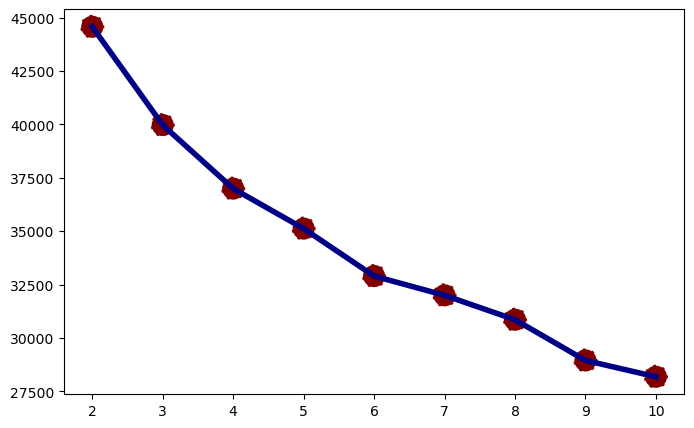

In [130]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dfs)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

In [131]:
#Cek persentase claster
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) *100

0    10.320978
1     7.443413
2     5.061183
3     6.323558
4     2.742468
5     3.568407
6     6.176881
7     2.641959
8          NaN
dtype: float64

Nilai K optimal adalah 4.

### K-Means Clustering
---

In [132]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(dfs.values)

KMeans(n_clusters=4, random_state=0)

In [133]:
clusters = kmeans.labels_
dfs['clusters'] = clusters
dfs.sample(5)

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,total_children,total_spending,total_transaction,cvr,clusters
1190,0.370819,-0.827781,0.904375,-1.489469,0.107196,2.919401,-0.235665,4.069983,2.992700,0.426373,...,-0.263244,-0.116988,-0.095303,-0.420603,0.675369,0.061122,0.779312,1.593188,-0.306131,3
1420,-1.190746,1.028252,-0.934162,0.515051,-0.869001,-0.662784,-0.696075,-0.650219,-0.656497,-0.656393,...,-0.263244,-0.116988,-0.095303,-0.420603,-1.204100,0.061122,-0.943604,-1.294089,-0.306131,2
115,-0.037970,1.028252,0.904375,-0.763695,-0.714709,-0.637558,-0.659242,-0.686952,-0.632330,-0.327696,...,-0.263244,-0.116988,-0.095303,-0.420603,0.589939,1.392623,-0.815426,-0.900369,-0.306131,2
360,-0.004192,1.028252,0.904375,0.618733,-0.171718,-0.460971,-0.019272,-0.576752,-0.463162,0.407038,...,-0.263244,-0.116988,-0.095303,-0.420603,0.162787,1.392623,-0.182858,0.936989,-0.306131,1
1960,-2.294217,-0.827781,0.904375,-1.696833,-0.857133,-0.561878,-0.700679,-0.650219,-0.559830,5.356825,...,-0.263244,-0.116988,-0.095303,-0.420603,-0.008074,0.061122,-0.407586,1.330709,-0.306131,1


In [134]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

pca.fit(dfs)
pcs = pca.transform(dfs)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

,PC 1,PC 2
0,4.602461,-0.495090
1,-3.040394,0.303955
2,1.984687,-0.473744
3,-2.876303,-1.392355
4,-0.334534,0.403876


In [135]:
df_pca['clusters'] = clusters
df_pca.head(2)

,PC 1,PC 2,clusters
0,4.602461,-0.495090,3
1,-3.040394,0.303955,2


Text(0.5, 1.0, 'Cluster Segementation')

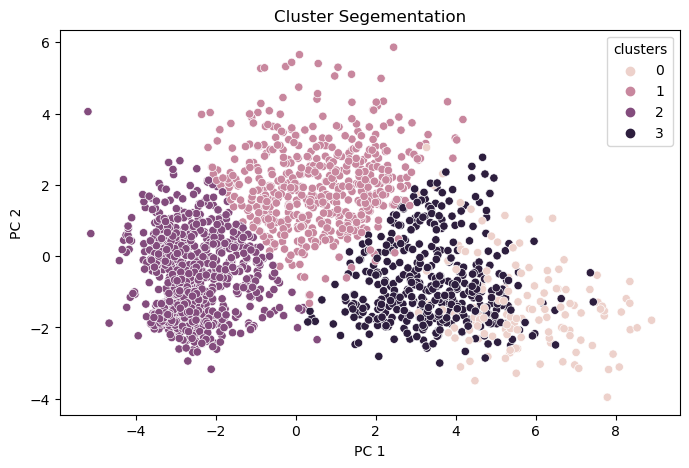

In [136]:
# visualisasi hasi segmentasi
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data=df_pca, x='PC 1', y='PC 2', hue='clusters')
plt.title('Cluster Segementation')

### Silhouette Score
---

In [137]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df_pca, clusters)
print(f'The silhouette score for 4 clusters is: {sil_score:.4f}')

The silhouette score for 4 clusters is: 0.5305


Silhouette score yang didapatkan adalah 0.5305 yang menunjukkan tingkat kualitas pengelompokan yang termasuk baik, dimana kelompok segmentasi tersebut cukup berbeda namun kemungkinan ada beberapa area yang overlap atau jarak kedekatannya ada di dekat batas cluster.

## **Customer Personality Analysis For Marketing Retargeting**

### Analysis & Interpretation
---

In [148]:
df3['clusters'] = kmeans.labels_

In [149]:
df3['cvr'] = df3['cvr'] * 100

In [150]:
feats = ['Recency','total_transaction','total_spending', 'Income', 'cvr','clusters', 'age']
df_summary = df3[feats]

In [151]:
round(df_summary.groupby('clusters').agg(['mean']),2).round()

,Recency,total_transaction,total_spending,Income,cvr,age
,mean,mean,mean,mean,mean,mean
clusters,,,,,,
0,43.0,21.0,1625736.0,81880530.0,44.0,53.0
1,48.0,21.0,706102.0,57501060.0,2.0,59.0
2,49.0,8.0,95733.0,34471528.0,1.0,52.0
3,52.0,21.0,1281427.0,72447485.0,2.0,57.0


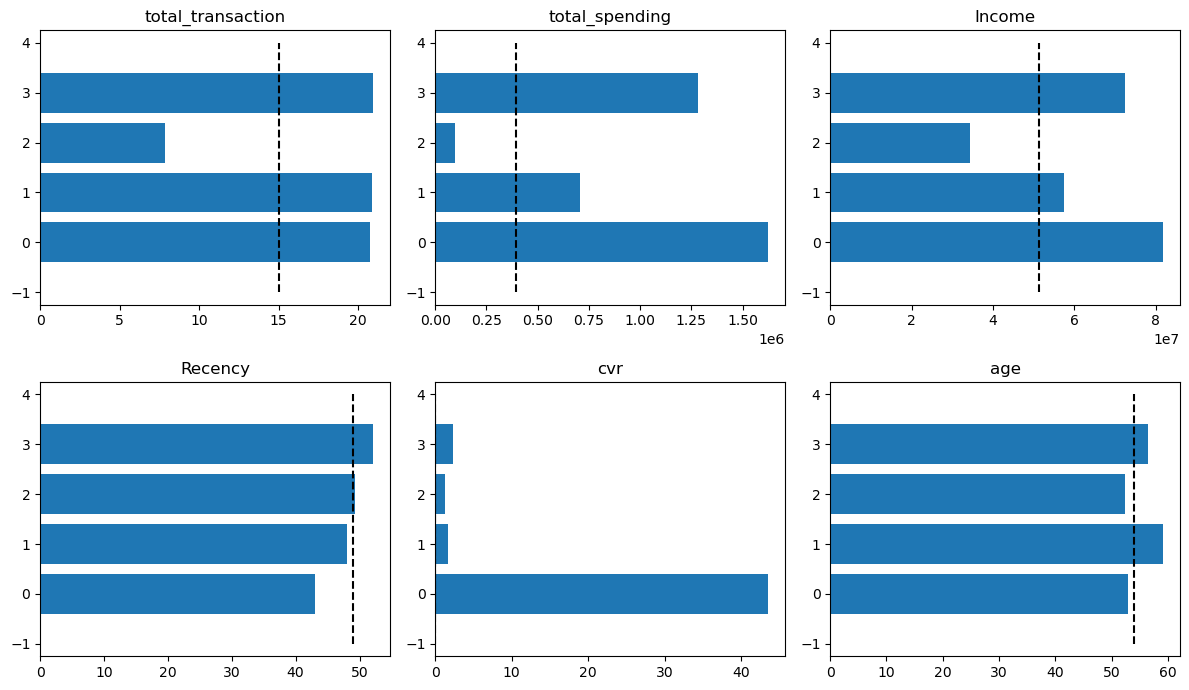

In [152]:
def dist_list(lst):
    plt.figure(figsize=[12, 7])
    i = 1
    for col in lst:
        ax = plt.subplot(2, 3, i)
        ax.vlines(df3[col].median(), ymin=-1, ymax=4, color='black', linestyle='--')
        g = df3.groupby('clusters')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x, y) 
        plt.title(col)
        i = i + 1

dist_list(['total_transaction','total_spending', 'Income', 'Recency', 'cvr', 'age'])
plt.tight_layout()
plt.show()

#### **Kesimpulan:**

**Cluster 0 (High Customer)**
- Angka pengeluaran paling tinggi yaitu Rp 1.625.736
- Income paling tinggi yaitu Rp 81.880.530
- Conversion rate paling tinggi di 44%
- Memiliki rata-rata umur 53 tahun

**Cluster 1 (Medium Customer)**
- Angka transaksi termasuk sedang yaitu Rp 706.102
- Income termasuk sedang yaitu Rp 57.501.060
- Conversion rate rendah di 2%
- Memiliki rata-rata umur 59 tahun

**Cluster 2 (Low Customer)**
- Angka transaksi paling rendah yaitu Rp 95.733
- Income paling rendah yaitu Rp 34.471.528
- Conversion rate paling rendah di 1%
- Memiliki rata-rata umur 52 tahun

**Cluster 3 (Medium - High Customer)**
- Angka transaksi termasuk agak tinggi yaitu Rp 1.281.427
- Income termasuk agak tinggi yaitu Rp 72.447.485
- Conversion rate rendah di 2%
- Memiliki rata-rata umur 57 tahun

In [163]:
# persentase total customer setiap cluster
cluster_count = df_summary['clusters'].value_counts().reset_index()
cluster_count.columns = ['clusters', 'count']
cluster_count['percentage'] = round((cluster_count['count']/len(df_summary))*100,2)
cluster_count = cluster_count.sort_values(by=['clusters']).reset_index(drop=True)
cluster_count

,clusters,count,percentage
0,0,148,6.66
1,1,591,26.60
2,2,1026,46.17
3,3,457,20.57


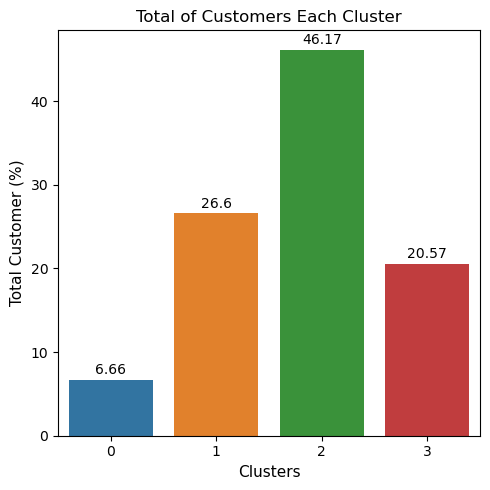

In [169]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x='clusters', y='percentage', data=cluster_count)
plt.title("Total of Customers Each Cluster")
plt.xlabel('Clusters', fontsize=11)
plt.ylabel('Total Customer (%)', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.tight_layout()
plt.show()

#### **Kesimpulan:**

- Total customer yang paling banyak berasal dari cluster 2, yaitu Low Customer. Walaupun customer di cluster 2 memiliki jumlah transaksi yang rendah, namun jumlahnya paling banyak. Hal ini bisa menjadi acuan untuk rekomendasi bagi perusahaan untuk membuat campaign yang menarik untuk Low Customer.
- Total customer paling rendah ada di cluster dengan transaksi dan pengeluaran paling tinggi, yaitu High Customer. Perusahaan bisa membuat campaign atau menawarkan produk yang sesuai dengan minat mereka.

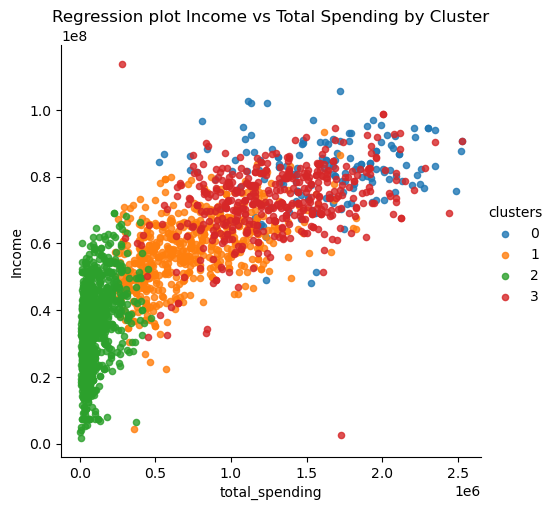

In [168]:
sns.lmplot(y='Income', x='total_spending', hue='clusters', fit_reg=False, data=df3, scatter_kws={'s':20, 'alpha':0.8}).set(
    title='Regression plot Income vs Total Spending by Cluster')

#### **Kesimpulan:**
- Plot regresi di atas menunjukkan korelasi positif antara income dan total pengeluaran. Semakin tinggi income dari customer, maka akan semaking tinggi juga total pengeluarannya.

### Marketing Retargeting & Recommendation
---

Berdasarkan analisis yang telah dilakukan, bisa dilihat bahwa customer terbagi menjadi beberapa cluster dengan karakteristik yang berbeda. Dari perbedaan tersebut, perusahaan bisa melakukan customer marketing retargeting untuk menawarkan produk atau layanan lewat marketing campaign yang berbeda-beda berdasarkan masing-masing kelompok customer. Berikut adalah beberapa rekomendasi:

**Low Customer (Cluster 2):**
- Perkenalkan program loyalitas yang memberikan insentif bagi customer untuk bertransaksi lebih sering. Misalnya, diskon setelah pembelian tertentu atau poin reward dan cashback yang dapat ditukar dengan produk atau layanan.
- Tingkatkan komunikasi melalui email atau media sosial untuk menjaga agar customer tetap menerima informasi tentang promosi dan produk baru.

**Medium - High Customer & Medium Customer (Cluster 4 & Cluster 1):**
- Melakukan penjualan bundling atau paket premium untuk meningkatkan ketertarikan dan penjualan pada produk lain.
- Memberikan penawaran eksklusif untuk produk atau layanan premium kepada customer untuk mendorong mereka melakukan pembelian dengan nilai yang lebih tinggi.

**High Customer (Cluster 0):**
- Memberikan akses eksklusif atau status VIP yang memberikan keuntungan khusus seperti akses awal ke produk baru, diskon eksklusif, atau layanan khusus.
- Menjaga hubungan baik dengan customer melalui membership yang menawarkan promosi khusus untuk yang bisa meningkatkan loyalitas customer.
- Manfaatkan referensi dari pelanggan High Customer untuk menarik pelanggan baru dengan profil serupa.